In [1]:
import datetime as datetime
from IPython.display import display
import matplotlib.pyplot as plt
from matplotlib.pyplot import text
%matplotlib inline
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import TweetTokenizer
import numpy as np
import pandas as pd
plt.style.use("bmh")
plt.rcParams['figure.figsize'] = (10, 5)
import re
from sklearn.feature_extraction.text import CountVectorizer
from string import punctuation

## Loading DataFrames

In [2]:
udf = pd.read_pickle('Your/Data/Path/tweaked_user_dataframe.pkl')
udf

,location,id,name,verified,public_metrics.followers_count,public_metrics.following_count,public_metrics.tweet_count,country
0,"Waiyaki Way, Westlands",697374646614781952,AACC-CETA,False,1565,666,2795,Kenya
1,NaN,87371572,ACNA,False,9023,1796,3393,NaN
2,Anglican Communion Office,903497472,Anglican Alliance,False,2291,1195,3599,United Kingdom
3,Rome,761714520,Anglican Centre Rome,False,2681,839,1733,Italia
4,"Nairobi, Kenya",1020255964044328961,Anglican Church of Kenya,False,1095,185,567,Kenya
...,...,...,...,...,...,...,...,...
166,"Federal Way, WA",11859822,World Vision USA,True,554386,14283,92602,United States
164,"Plot 15B Nakasero, Kampala",759998299,World Vision Uganda,False,4278,580,3375,Uganda
167,"Dakar, Senegal",830807449,World Vision West Africa,False,2245,563,2088,Sénégal
157,"Addis Ababa, Ethiopia",2231308272,WorldVision Ethiopia,False,1958,178,420,ኢትዮጵያ


In [3]:
df = pd.read_pickle('Your/Data/Path/tweet_dataframe_p2.pkl')
df

,author_id,text,lang,referenced_tweets,reply_settings,conversation_id,id,created_at,entities.mentions,entities.annotations,...,entities.urls,in_reply_to_user_id,geo.place_id,geo.coordinates.type,geo.coordinates.coordinates,withheld.copyright,withheld.country_codes,withheld.scope,entities.cashtags,text_processed
0,697374646614781952,RT @AWalkerSmith7: @AaccCeta @ArchbishopSapit ...,en,"[{'type': 'retweeted', 'id': '1437029861676228...",everyone,1437051433480753156,1437051433480753156,2021-09-12 13:52:15+00:00,"[{'start': 3, 'end': 17, 'username': 'AWalkerS...","[{'start': 93, 'end': 95, 'probability': 0.919...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[thanking, god, historic, moment, church, hist..."
1,697374646614781952,RT @sceptwic: Another important step in road t...,en,"[{'type': 'retweeted', 'id': '1437043141979295...",everyone,1437051325255192582,1437051325255192582,2021-09-12 13:51:49+00:00,"[{'start': 3, 'end': 12, 'username': 'sceptwic...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[another, important, step, road, #justicedigni..."
2,697374646614781952,Congratulations Ven Rose Okeno ACK Diocese of ...,en,NaN,everyone,1436979065114800131,1436979065114800131,2021-09-12 09:04:41+00:00,NaN,"[{'start': 16, 'end': 29, 'probability': 0.516...",...,"[{'start': 213, 'end': 236, 'url': 'https://t....",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[congratulations, ven, rose, okeno, ack, dioce..."
3,697374646614781952,Consecration Service of Ven Rose Okeno ACK Dio...,en,NaN,everyone,1436975615480041473,1436975615480041473,2021-09-12 08:50:59+00:00,NaN,"[{'start': 124, 'end': 147, 'probability': 0.5...",...,"[{'start': 239, 'end': 262, 'url': 'https://t....",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[consecration, service, ven, rose, okeno, ack,..."
4,697374646614781952,We are looking forward to today’s Consecration...,en,"[{'type': 'replied_to', 'id': '143695708915549...",everyone,1436957089155493889,1436957092787757056,2021-09-12 07:37:22+00:00,NaN,"[{'start': 116, 'end': 124, 'probability': 0.6...",...,NaN,697374646614781952,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[looking, forward, today, consecration, enthro..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308837,2193947323,In our New Year Message to the Nation we proff...,en,"[{'type': 'quoted', 'id': '1082850893807144962'}]",everyone,1082937561537044480,1082937561537044480,2019-01-09 09:50:09+00:00,NaN,NaN,...,"[{'start': 271, 'end': 294, 'url': 'https://t....",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[new, year, message, nation, proffered, areas,..."
308838,2193947323,RT @NewsDayZimbabwe: THE @zccinzim has launche...,en,"[{'type': 'retweeted', 'id': '1082932233500065...",everyone,1082934512777117696,1082934512777117696,2019-01-09 09:38:02+00:00,"[{'start': 3, 'end': 19, 'username': 'NewsDayZ...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[launched, fresh, bid, broker, dialogue, presi..."
308839,2193947323,We can choose the route of engagement or that ...,en,NaN,everyone,1082904479526240256,1082904479526240256,2019-01-09 07:38:41+00:00,"[{'start': 211, 'end': 227, 'username': 'NewsD...",NaN,...,"[{'start': 183, 'end': 206, 'url': 'https://t....",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[choose, route, engagement, conflict, route, i..."
308840,2193947323,"For many Zimbabweans, 2019 has come amidst muc...",en,NaN,everyone,1082548265617371137,1082548265617371137,2019-01-08 08:03:13+00:00,"[{'start': 187, 'end': 199, 'username': 'EFZZI...",NaN,...,"[{'start': 264, 'end': 287, 'url': 'https://t....",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[many, zimbabweans, come, amidst, much, hardsh..."


## Cleanup

In [5]:
# Functions
# --- Drop columns not needed for analysis from tweet DataFrame
def clean_tweet(df):
    return (df
           .drop(columns=[c for c in df.columns if 'entities.cashtags' in c])
           .drop(columns=['id', 'lang', 'in_reply_to_user_id', 'conversation_id',
                          'public_metrics.retweet_count', 'public_metrics.reply_count',
                          'public_metrics.like_count', 'public_metrics.quote_count',
                          'entities.urls',
                          'geo.place_id', 'geo.coordinates.type', 'geo.coordinates.coordinates', 
                          'withheld.copyright', 'withheld.country_codes', 'withheld.scope', 'reply_settings'])
                          )

# --- Modify tweet DataFrame to add new columns needed for analysis
def modify_tweet(df):
    return (clean_tweet(df)
                .assign(is_reply=df['text'].str.startswith('@'),
                   referenced_type=df['referenced_tweets'].apply(lambda t: t[0]['type'] if isinstance(t, list) else np.nan),
                   length=lambda df_:df_.text.str.len(),
                   tweet_count=1,
                   created_truncated=df['created_at'].apply(lambda d: datetime.date(d.year, d.month, d.day)),
                  )
           )

# --- merge modified tweet and user DataFrames
def create_analysis_frame(df1, df2):
    return(modify_tweet(df1)
            .merge(df2, left_on='author_id', right_on='id', how='left')
            .drop(columns = ['id', 'referenced_tweets', 'verified', 'location',
                                'public_metrics.following_count', 'public_metrics.tweet_count'])
            )

# Main
tdf = create_analysis_frame(df, udf)

with pd.option_context('display.max_colwidth', 280):
    display(tdf)

,author_id,text,created_at,entities.mentions,entities.annotations,entities.hashtags,text_processed,is_reply,referenced_type,length,tweet_count,created_truncated,name,public_metrics.followers_count,country
0,697374646614781952,RT @AWalkerSmith7: @AaccCeta @ArchbishopSapit @LesmoreGEzkiel @DrMwaniki @fmwombeki Thanking God 4 this historic moment n church history n Kenya! 2 God b the glory! Ashe! Amen! @Oikoumene @AaccCeta @AdNAUbuntu @JaCouncilChurch @ncccusa @iamepiscopalian @GETIWCC @WCCpaween @An...,2021-09-12 13:52:15+00:00,"[{'start': 3, 'end': 17, 'username': 'AWalkerSmith7', 'id': '1868363888'}, {'start': 19, 'end': 28, 'username': 'AaccCeta', 'id': '697374646614781952'}, {'start': 29, 'end': 45, 'username': 'ArchbishopSapit', 'id': '798412484742959105'}, {'start': 46, 'end': 61, 'username': '...","[{'start': 93, 'end': 95, 'probability': 0.9196, 'type': 'Other', 'normalized_text': 'God'}]",NaN,"[thanking, god, historic, moment, church, history, kenya, god, glory, ashe, amen]",False,retweeted,363,1,2021-09-12,AACC-CETA,1565,Kenya
1,697374646614781952,RT @sceptwic: Another important step in road to #JusticeDignitySolidarity. Kenyan churches leading the way it seems as number of women in #episcopate rises again. @ACK @full_kenya https://t.co/CAPRZdimkq,2021-09-12 13:51:49+00:00,"[{'start': 3, 'end': 12, 'username': 'sceptwic', 'id': '35702398'}]",NaN,"[{'start': 48, 'end': 73, 'tag': 'JusticeDignitySolidarity'}]","[another, important, step, road, #justicedignitysolidarity, kenyan, churches, leading, way, seems, number, women, #episcopate, rises, <-url->]",False,retweeted,203,1,2021-09-12,AACC-CETA,1565,Kenya
2,697374646614781952,Congratulations Ven Rose Okeno ACK Diocese of Butere. The first Woman Diocesan Bishop in the history of the Anglican Church of Kenya. We thank God for the new chapters being written in the history of the Church. https://t.co/6Up7M3cEsb,2021-09-12 09:04:41+00:00,NaN,"[{'start': 16, 'end': 29, 'probability': 0.5163, 'type': 'Person', 'normalized_text': 'Ven Rose Okeno'}, {'start': 108, 'end': 131, 'probability': 0.5879, 'type': 'Place', 'normalized_text': 'Anglican Church of Kenya'}, {'start': 144, 'end': 146, 'probability': 0.976, 'type':...",NaN,"[congratulations, ven, rose, okeno, ack, diocese, butere, first, woman, diocesan, bishop, history, anglican, church, kenya, thank, god, new, chapters, written, history, church, <-url->]",False,NaN,236,1,2021-09-12,AACC-CETA,1565,Kenya
3,697374646614781952,Consecration Service of Ven Rose Okeno ACK Diocese of Butere. She is the first Woman Diocesan Bishop in the history of the Anglican Church of Kenya. New chapters being written in the history of the Church. We thank God for such moments. https://t.co/hzkus3byb5,2021-09-12 08:50:59+00:00,NaN,"[{'start': 124, 'end': 147, 'probability': 0.5667, 'type': 'Place', 'normalized_text': 'Anglican Church of Kenya'}, {'start': 217, 'end': 219, 'probability': 0.9677, 'type': 'Other', 'normalized_text': 'God'}]",NaN,"[consecration, service, ven, rose, okeno, ack, diocese, butere, first, woman, diocesan, bishop, history, anglican, church, kenya, new, chapters, written, history, church, thank, god, moments, <-url->]",False,NaN,262,1,2021-09-12,AACC-CETA,1565,Kenya
4,697374646614781952,We are looking forward to today’s Consecration and Enthronement of the first Woman Bishop in The Anglican Church of Kenya Ven. Rose Okeno.,2021-09-12 07:37:22+00:00,NaN,"[{'start': 116, 'end': 124, 'probability': 0.6155, 'type': 'Place', 'normalized_text': 'Kenya Ven'}, {'start': 127, 'end': 136, 'probability': 0.8553, 'type': 'Person', 'normalized_text': 'Rose Okeno'}]",NaN,"[looking, forward, today, consecration, enthronement, first, woman, bishop, anglican, church, kenya, ven, rose, okeno]",False,replied_to,138,1,2021-09-12,AACC-CETA,1565,Kenya
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287650,2193947323,In our New Year Message to the Nation we proffered 4 areas that need to be address to avert the possible catastrophe

In [6]:
def tweet_counter(df):
    return (df
            .set_index('created_at')
            .sort_index()
            .tweet_count
            .resample('d')
            .sum()
            .rename('counts')
            .to_frame()
           )

In [7]:
def median_abs_dev(df, constant=None):
    if constant is None:
        # allows us to use the MAD to roughly approximate to the standard deviation
        # see the wikipedia page
        constant = 1.4826
    return constant * np.median(np.abs((df - np.median(df))))


def mad_normalize(df, constant=None):
    # puts this dataframe into multiples of the MAD, similar to Zscoring
    # abs(x - median(x)) / MAD(df)
    return (df
             .sub(np.median(df))
             .pipe(np.abs)
             .div(median_abs_dev(df)))

In [8]:
def top_dates(df):
    return (df
             .pipe(np.log)
             .diff()
             .dropna()
             .pipe(mad_normalize)
             .sort_values(by="counts", ascending=False)
             .head()
             .index
             .values
            )

In [9]:
TWEET_TOKENIZER = TweetTokenizer(preserve_case=False,
                                 strip_handles=True, reduce_len=False)
STOPWORDS = (set(nltk.corpus.stopwords.words("english")) |
             {"...", '…', '•', '’', "com"} |
             set(punctuation))

def replace_urls(string, replacement=None):
    if replacement is None:
        replacement = "<-URL->"
    pattern = re.compile('(https?://)?(\w*[.]\w+)+([/?=&]+\w+)*')
    return re.sub(pattern, replacement, string)

def tokenizer(tweet_text, custom_words=None):
    text = (replace_urls(tweet_text))
    tokens = TWEET_TOKENIZER.tokenize(text.lower())
    tokens = (token for token in tokens if token not in punctuation)
    tokens = (token for token in tokens if token.islower())
    tokens = (token for token in tokens if token not in STOPWORDS)
    tokens = (token for token in tokens if len(token) >= 3)
    if custom_words:
        tokens = (token for token in tokens if token not in custom_words)
    return list(tokens)

def get_frequent_terms(text_series, stop_words=None, ngram_range=None):
    if ngram_range is None:
        ngram_range = (1, 3)
    '''
    Input:
       text_series: a list or series of documents
       stop_words: a list of stop_words to ignore, or the string 'english',
                   which uses a built-in stop word list for the english language.
                   By default, there are no stop words used
       ngram_range: a single int, or a 2 tuple representing the range of ngrams to count.
                    the default (1,2) counts 1- and 2- grams.
    Returns:
       a dataframe of counts, indexed by n-gram
    '''
    count_vectorizer = CountVectorizer(analyzer = "word",
                                       tokenizer = tokenizer,
                                       stop_words = stop_words, # try changing the stopword sets that we use.
                                                                # notice that many top terms are words like
                                                                # "and" and "the"
                                       ngram_range = ngram_range # you can change this to count frequencies of
                                                           # ngrams as well as single tokens
                                                           # a range of (1,2) counts 1-grams (single tokens) and
                                                           # 2-grams (2-token phrases)
                                      )
    term_freq_matrix = count_vectorizer.fit_transform(text_series)
    terms = count_vectorizer.get_feature_names()
    term_frequencies = term_freq_matrix.sum(axis = 0).tolist()[0]

    term_freq_df = (pd.DataFrame(list(zip(terms, term_frequencies)), columns = ["token","count"])
                    .set_index("token")
                    .sort_values("count",ascending = False))
    return term_freq_df

## Communication Volume

In [10]:
# Create DataFrame with tweets/day
ddf =(tdf
      .set_index('created_at')
      .sort_index()
      .tweet_count
      .resample('d')
      .sum()
      .rename('counts')
      .to_frame()
     )
ddf

,counts
created_at,
2019-01-01 00:00:00+00:00,123
2019-01-02 00:00:00+00:00,182
2019-01-03 00:00:00+00:00,213
2019-01-04 00:00:00+00:00,206
2019-01-05 00:00:00+00:00,98
...,...
2021-09-08 00:00:00+00:00,204
2021-09-09 00:00:00+00:00,190
2021-09-10 00:00:00+00:00,215


<AxesSubplot:xlabel='created_at'>

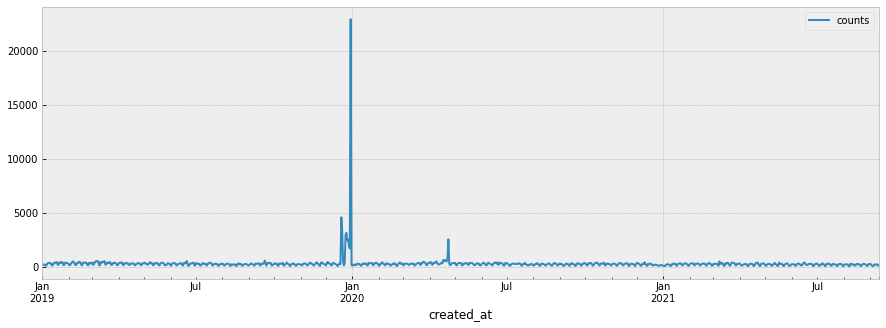

In [11]:
# Plot tweets/day
fig, ax = plt.subplots(figsize=(15,5))
(ddf
 .plot(ax=ax)
)

<AxesSubplot:xlabel='created_at'>

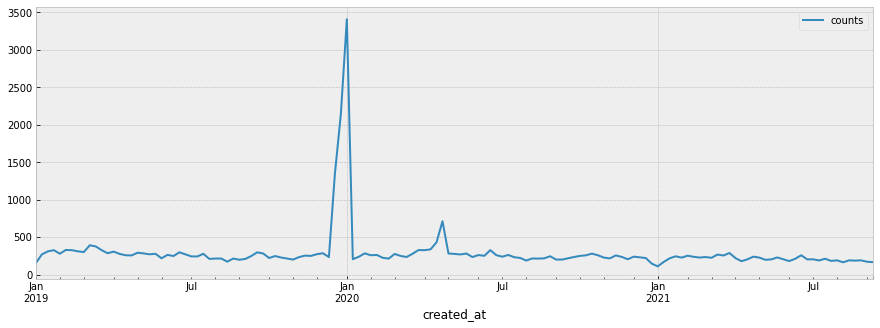

In [12]:
# Plot tweets/week
fig, ax = plt.subplots(figsize=(15,5))
(ddf
 .resample('w')
 .mean()
 .plot(ax=ax)
)

##### Gesamtkommunikationsvolumen

Text(0.5, 1.0, 'Gleitender Mittelwert der täglichen Tweets')

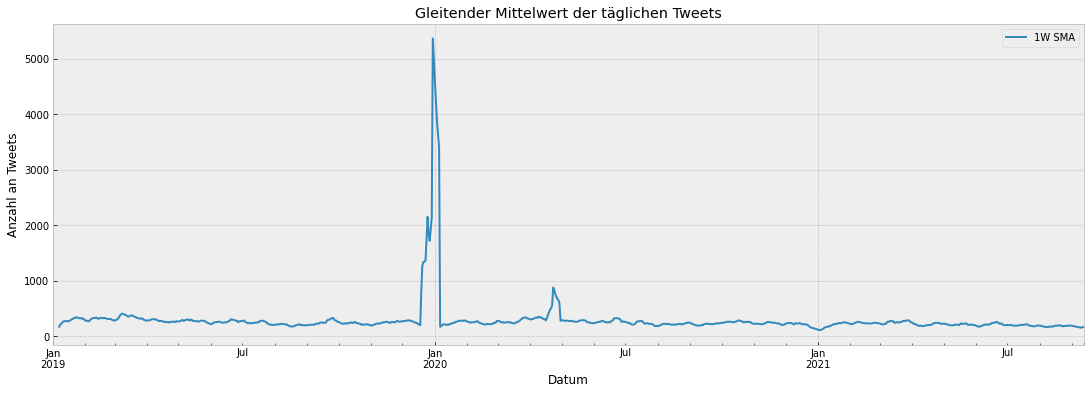

In [14]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize = (10, 5))
fig.tight_layout()
(ddf 
 .rolling(7) # rolling(7) instead of resample(w) to keep weekend dips visible
 .mean()
 .rename(columns={"counts": "1W SMA"})
 .plot(ax=axes)
)

axes.set_xlabel('Date')
axes.set_ylabel('Number of Tweets')
axes.set_title('Simple Moving Average of Number of Tweets')

##### Peak 3 - Zoom in on timeframe

Text(0.5, 1.0, 'Gleitender Mittelwert der täglichen Tweets')

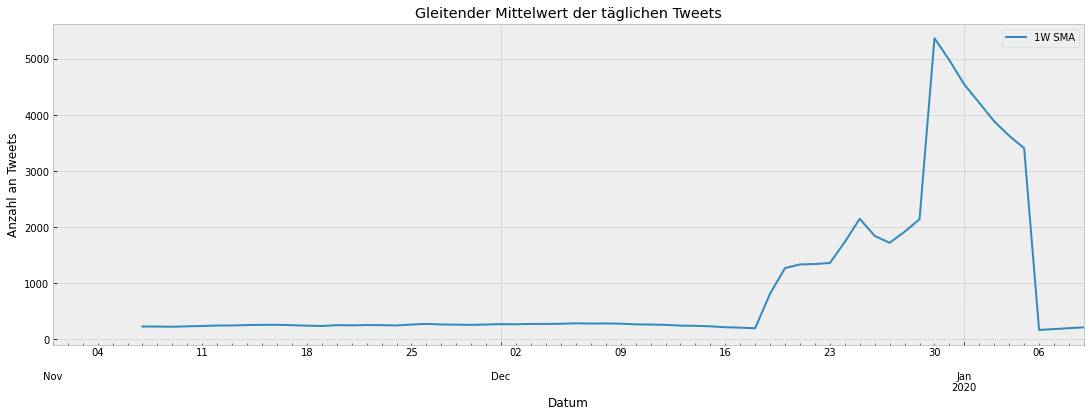

In [15]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize = (15, 5))
fig.tight_layout()
(ddf
 .loc[(ddf.index >= '2019-11-01') &
      (ddf.index < '2020-01-10')]
 .rolling(7)
 .mean()
 .rename(columns={"counts": "1W SMA"})
 .plot(ax=axes)
)

axes.set_xlabel('Date')
axes.set_ylabel('Number of Tweets')
axes.set_title('Moving average of Tweets/Day')

Text(0.5, 1.0, 'Gleitender Mittelwert der täglichen Tweets')

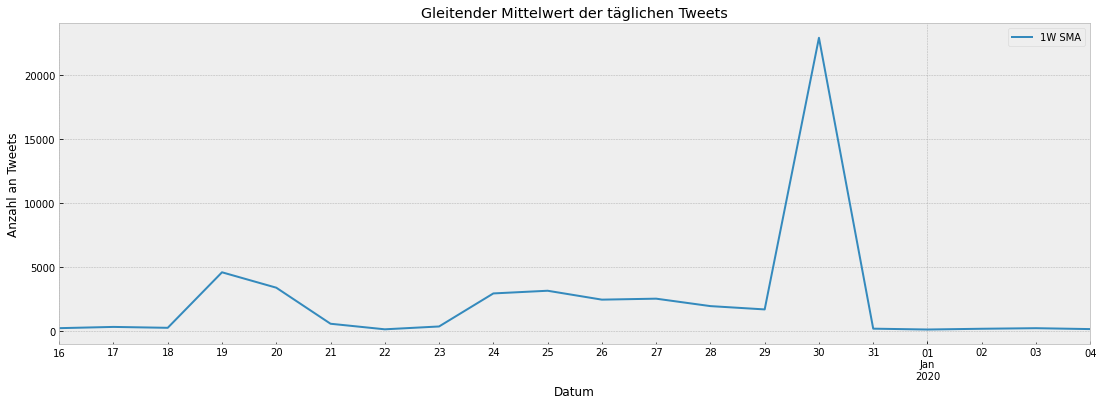

In [16]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize = (15, 5))
fig.tight_layout()
(ddf
 .loc[(ddf.index >= '2019-12-16') &
      (ddf.index < '2020-01-05')]
 .rename(columns={"counts": "1W SMA"})
 .plot(ax=axes)
)

axes.set_xlabel('Date')
axes.set_ylabel('Number of Tweets')
axes.set_title('Moving average of Tweets/Day')

Text(0.5, 1.0, 'Gleitender Mittelwert der täglichen Tweets')

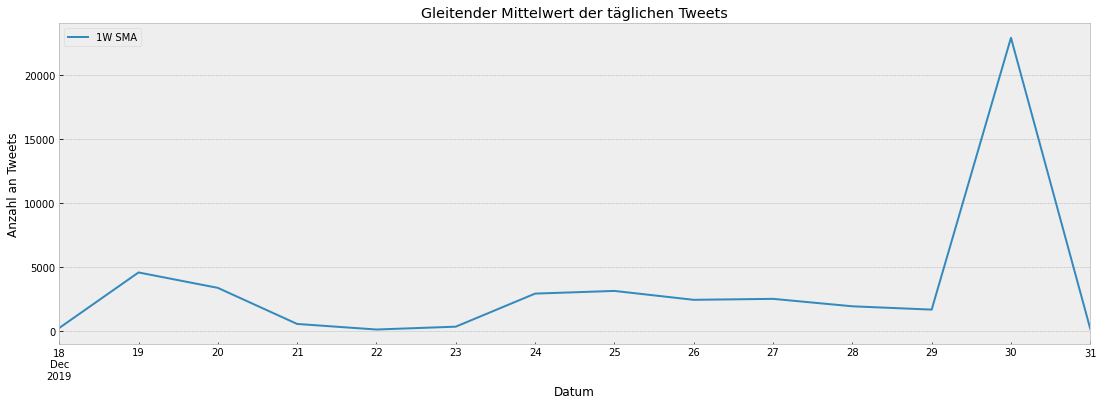

In [27]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize = (15, 5))
fig.tight_layout()
(ddf
 .loc[(ddf.index >= '2019-12-18') &
      (ddf.index < '2020-01-01')]
 .rename(columns={"counts": "1W SMA"})
 .plot(ax=axes)
)

axes.set_xlabel('Date')
axes.set_ylabel('Number of Tweets')
axes.set_title('Moving average of Tweets/Day')

In [28]:
ndf = tdf[(tdf['created_at'] >= '2019-12-18') & (tdf['created_at'] < '2020-01-01')]
ndf

,author_id,text,created_at,entities.mentions,entities.annotations,entities.hashtags,text_processed,is_reply,referenced_type,length,tweet_count,created_truncated,name,public_metrics.followers_count,country
586,697374646614781952,"The AACC, represented by Rev. Dr. Lydia Mwanik...",2019-12-21 07:44:10+00:00,NaN,"[{'start': 30, 'end': 46, 'probability': 0.571...",NaN,"[aacc, represented, rev, lydia, mwaniki, gende...",False,NaN,278,1,2019-12-21,AACC-CETA,1565,Kenya
1319,87371572,"Church! It's the end of the decade, and the la...",2019-12-31 05:21:00+00:00,NaN,"[{'start': 104, 'end': 116, 'probability': 0.9...",NaN,"[church, end, decade, last, day, year, give, a...",False,NaN,288,1,2019-12-31,ACNA,9023,NaN
1320,87371572,Only two days remain this year to give to the ...,2019-12-29 15:51:34+00:00,NaN,"[{'start': 46, 'end': 60, 'probability': 0.475...",NaN,"[two, days, remain, year, give, anglican, chur...",False,NaN,238,1,2019-12-29,ACNA,9023,NaN
1321,87371572,“To us a child is born; \nto us a son is given...,2019-12-25 14:11:43+00:00,NaN,"[{'start': 92, 'end': 100, 'probability': 0.99...",NaN,"[child, born, son, given, wishing, merry, bles...",False,NaN,181,1,2019-12-25,ACNA,9023,NaN
1322,87371572,Listen to Archbishop Foley Beach's Christmas m...,2019-12-24 06:14:36+00:00,NaN,"[{'start': 10, 'end': 31, 'probability': 0.255...",NaN,"[listen, archbishop, foley, beach's, christmas...",False,NaN,199,1,2019-12-24,ACNA,9023,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
285486,196547848,"The Council of Europe @coe,a greatly appreciat...",2019-12-18 16:41:41+00:00,"[{'start': 22, 'end': 26, 'username': 'coe', '...","[{'start': 15, 'end': 20, 'probability': 0.820...","[{'start': 232, 'end': 248, 'tag': 'councilofe...","[council, europe, greatly, appreciated, partne...",False,NaN,301,1,2019-12-18,WSCF Europe,1026,Deutschland
286021,1511695525,"RT @ELCA: Less than one month left! Jan. 15, 2...",2019-12-20 03:34:03+00:00,"[{'start': 3, 'end': 8, 'username': 'ELCA', 'i...",NaN,NaN,"[less, one, month, left, jan, deadline, priori...",False,retweeted,285,1,2019-12-20,ELCA YAGM,2139,United States
287020,2193947323,Merry Christmas from the Zimbabwe Council of C...,2019-12-25 03:51:33+00:00,NaN,"[{'start': 6, 'end': 14, 'probability': 0.6068...",NaN,"[merry, christmas, zimbabwe, council, churches...",False,NaN,110,1,2019-12-25,Zimbabwe Council of Churches,5834,Zimbabwe
287021,2193947323,Many times a question has been thrown around w...,2019-12-19 13:34:28+00:00,"[{'start': 131, 'end': 144, 'username': 'kenne...",NaN,NaN,"[many, times, question, thrown, around, church...",False,NaN,229,1,2019-12-19,Zimbabwe Council of Churches,5834,Zimbabwe


##### Peak 3 - Check for most frequently used words

In [166]:
top_dates(tweet_counter(ndf))

array(['2019-11-23T00:00:00.000000000', '2019-11-30T00:00:00.000000000',
       '2019-11-29T00:00:00.000000000', '2019-11-25T00:00:00.000000000',
       '2019-11-24T00:00:00.000000000'], dtype='datetime64[ns]')

In [29]:
get_frequent_terms(ndf['text']).head(15)

,count
token,
gift,44710
life-changing,44647
life-changing gift,44646
<-url->,24634
thank,22664
make,22494
come,22477
wish,22474
heart,22458


In [30]:
(ndf
 .groupby('author_id')
 .agg({'tweet_count': 'count', 'name': 'last','country': 'last'})
 .sort_values('tweet_count',ascending = False)
 .reset_index(drop=True)
 .rename(columns={'tweet_count': 'Tweets', 'name': 'Nutzername', 'country': 'Land'})
)

,Tweets,Nutzername,Land
0,44835,World Vision USA,United States
1,245,Interfaith Matters,None
2,199,BAME Anglican.,日本
3,106,Compassion International,United States
4,94,Micah Institute,United States
...,...,...,...
98,1,Journal of Interreligious Studies,United States
99,1,GTU,United States
100,1,AACC-CETA,Kenya
101,1,Canadian Lutheran World Relief,Canada


##### Peak 3 - Identify tweet text

In [31]:
(ndf[ndf['text'].str.contains('Thank you for the ❤. We’ll remind you to make a child\'s wish come true with a life-changing gift from the heart!')])

,author_id,text,created_at,entities.mentions,entities.annotations,entities.hashtags,text_processed,is_reply,referenced_type,length,tweet_count,created_truncated,name,public_metrics.followers_count,country
256826,11859822,@3RingCommNYC Thank you for the ❤. We’ll remin...,2019-12-30 16:58:22+00:00,"[{'start': 0, 'end': 13, 'username': '3RingCom...",NaN,NaN,"[thank, remind, make, child's, wish, come, tru...",True,NaN,126,1,2019-12-30,World Vision USA,554386,United States
256827,11859822,@1bchambers Thank you for the ❤. We’ll remind ...,2019-12-30 16:51:27+00:00,"[{'start': 0, 'end': 11, 'username': '1bchambe...",NaN,NaN,"[thank, remind, make, child's, wish, come, tru...",True,NaN,124,1,2019-12-30,World Vision USA,554386,United States
256828,11859822,@alvinfirstdevco Thank you for the ❤. We’ll re...,2019-12-30 16:45:16+00:00,"[{'start': 0, 'end': 16, 'username': 'alvinfir...",NaN,NaN,"[thank, remind, make, child's, wish, come, tru...",True,NaN,129,1,2019-12-30,World Vision USA,554386,United States
256830,11859822,@_Ellie_D_ Thank you for the ❤. We’ll remind y...,2019-12-30 16:43:38+00:00,"[{'start': 0, 'end': 10, 'username': '_Ellie_D...",NaN,NaN,"[thank, remind, make, child's, wish, come, tru...",True,NaN,123,1,2019-12-30,World Vision USA,554386,United States
256831,11859822,@diaznereida90 Thank you for the ❤. We’ll remi...,2019-12-30 16:42:29+00:00,"[{'start': 0, 'end': 14, 'username': 'diaznere...",NaN,NaN,"[thank, remind, make, child's, wish, come, tru...",True,NaN,127,1,2019-12-30,World Vision USA,554386,United States
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279433,11859822,@sharesurf3 Thank you for the ❤. We’ll remind ...,2019-12-19 02:34:19+00:00,"[{'start': 0, 'end': 11, 'username': 'sharesur...",NaN,NaN,"[thank, remind, make, child's, wish, come, tru...",True,NaN,124,1,2019-12-19,World Vision USA,554386,United States
279434,11859822,@adscurlock Thank you for the ❤. We’ll remind ...,2019-12-19 02:34:18+00:00,"[{'start': 0, 'end': 11, 'username': 'adscurlo...",NaN,NaN,"[thank, remind, make, child's, wish, come, tru...",True,NaN,124,1,2019-12-19,World Vision USA,554386,United States
279435,11859822,@KerryStubbsSC Thank you for the ❤. We’ll remi...,2019-12-19 02:32:54+00:00,"[{'start': 0, 'end': 14, 'username': 'KerryStu...",NaN,NaN,"[thank, remind, make, child's, wish, come, tru...",True,NaN,127,1,2019-12-19,World Vision USA,554386,United States
279436,11859822,@mariahlee222 Thank you for the ❤. We’ll remin...,2019-12-19 02:31:54+00:00,"[{'start': 0, 'end': 13, 'username': 'mariahle...",NaN,NaN,"[thank, remind, make, child's, wish, come, tru...",True,NaN,126,1,2019-12-19,World Vision USA,554386,United States


In [178]:
tweets_answer = (ndf[ndf['text']
                       .str
                       .contains('Thank you for your generosity. We’ll remind you on Giving Tuesday to empower kids in poverty with a MATCH opportunity!')
                      ]
                  )

rest_df = ndf.drop(tweets_answer.index, axis=0)


get_frequent_terms(rest_df['text'])

,count
token,
<-url->,5771
poverty,3237
giving,3233
check,3230
opportunity,3224
...,...
faith advocacy,1
faith advocacy resource,1
faith attack,1


In [188]:
rest_df[(rest_df['text'].str.contains('poverty')) & (rest_df['text'].str.contains(re.compile(r'(C|c)heck')))]

C:\Users\Jo\AppData\Local\Temp/ipykernel_17000/1413107128.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  rest_df[(rest_df['text'].str.contains('poverty')) & (rest_df['text'].str.contains(re.compile(r'(C|c)heck')))]


,author_id,text,created_at,entities.mentions,entities.annotations,entities.hashtags,text_processed,is_reply,referenced_type,length,tweet_count,created_truncated,name,public_metrics.followers_count,country
290080,11859822,@inquewitch We’ll remind you on Giving Tuesday to empower kids in poverty with a MATCH opportunity! Check out what's in store... https://t.co/v6LOiTBRwe,2019-11-30 22:18:33+00:00,"[{'start': 0, 'end': 11, 'username': 'inquewitch', 'id': '408865731'}]",NaN,NaN,"[remind, giving, tuesday, empower, kids, poverty, match, opportunity, check, what's, store, <-url->]",True,NaN,152,1,2019-11-30,World Vision USA,554386,United States
290082,11859822,@QuintilianoJo We’ll remind you on Giving Tuesday to empower kids in poverty with a MATCH opportunity! Check out what's in store... https://t.co/uP66PER5pL,2019-11-30 19:55:31+00:00,"[{'start': 0, 'end': 14, 'username': 'QuintilianoJo', 'id': '717722015726055424'}]",NaN,NaN,"[remind, giving, tuesday, empower, kids, poverty, match, opportunity, check, what's, store, <-url->]",True,NaN,155,1,2019-11-30,World Vision USA,554386,United States
290083,11859822,@hawseyc94 We’ll remind you on Giving Tuesday to empower kids in poverty with a MATCH opportunity! Check out what's in store... https://t.co/ArfggW31pH,2019-11-30 19:10:47+00:00,"[{'start': 0, 'end': 10, 'username': 'hawseyc94', 'id': '1128462720095879170'}]",NaN,NaN,"[remind, giving, tuesday, empower, kids, poverty, match, opportunity, check, what's, store, <-url->]",True,NaN,151,1,2019-11-30,World Vision USA,554386,United States
290084,11859822,@laineeluna We’ll remind you on Giving Tuesday to empower kids in poverty with a MATCH opportunity! Check out what's in store... https://t.co/hVcpCILOSp,2019-11-30 18:47:52+00:00,NaN,NaN,NaN,"[remind, giving, tuesday, empower, kids, poverty, match, opportunity, check, what's, store, <-url->]",True,NaN,152,1,2019-11-30,World Vision USA,554386,United States
290085,11859822,@AnnetteMardis48 We’ll remind you on Giving Tuesday to empower kids in poverty with a MATCH opportunity! Check out what's in store... https://t.co/GzXVKJUuwD,2019-11-30 18:01:30+00:00,"[{'start': 0, 'end': 16, 'username': 'AnnetteMardis48', 'id': '535856660'}]",NaN,NaN,"[remind, giving, tuesday, empower, kids, poverty, match, opportunity, check, what's, store, <-url->]",True,NaN,157,1,2019-11-30,World Vision USA,554386,United States
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
293308,11859822,@jadewood70 We’ll remind you on Giving Tuesday to empower kids in poverty with a MATCH opportunity! Check out what's in store... https://t.co/RrTwG3B5Oa,2019-11-26 21:07:29+00:00,"[{'start': 0, 'end': 11, 'username': 'jadewood70', 'id': '250270399'}]",NaN,NaN,"[remind, giving, tuesday, empower, kids, poverty, match, opportunity, check, what's, store, <-url->]",True,NaN,152,1,2019-11-26,World Vision USA,554386,United States
293309,11859822,@Elsie80146153 We’ll remind you on Giving Tuesday to empower kids in poverty with a MATCH opportunity! Check out what's in store... https://t.co/lSTreIBMTP,2019-11-26 21:07:15+00:00,NaN,NaN,NaN,"[remind, giving, tuesday, empower, kids, poverty, match, opportunity, check, what's, store, <-url->]",True,NaN,155,1,2019-11-26,World Vision USA,554386,United States
293310,11859822,@Kenneth23254449 We’ll remind you on Giving Tuesday to empower kids in poverty with a MATCH opportunity! Check out what's in store... https://t.co/lgU1LPOgov,2019-11-26 21:06:50+00:00,"[{'start': 0, 'end': 16, 'username': 'Kenneth23254449', 'id': '855119193586454530'}]",NaN,NaN,"[remind, giving, tuesday, empower, kids, poverty, match, opportunity, check, what's, store, <-url->]",True,NaN,157,1,2019-11-26,World Vision USA,554386,United States
293311,11859822,@GraceMc01767027 We’ll remind you on Giving Tuesday to empower kids in poverty with a MATCH opportunity! Check out what's in store... https://t.co/tOCC5v1tIe,2019-11-26 21:05:58+00:00,"[{'start': 0, 'end': 16, 'username': 'GraceMc01767027', 'id': '829082

In [189]:
rest_df[(rest_df['text']
         .str
         .contains('We’ll remind you on Giving Tuesday to empower kids in poverty with a MATCH opportunity! Check out what\'s in store'))]

,author_id,text,created_at,entities.mentions,entities.annotations,entities.hashtags,text_processed,is_reply,referenced_type,length,tweet_count,created_truncated,name,public_metrics.followers_count,country
290080,11859822,@inquewitch We’ll remind you on Giving Tuesday to empower kids in poverty with a MATCH opportunity! Check out what's in store... https://t.co/v6LOiTBRwe,2019-11-30 22:18:33+00:00,"[{'start': 0, 'end': 11, 'username': 'inquewitch', 'id': '408865731'}]",NaN,NaN,"[remind, giving, tuesday, empower, kids, poverty, match, opportunity, check, what's, store, <-url->]",True,NaN,152,1,2019-11-30,World Vision USA,554386,United States
290082,11859822,@QuintilianoJo We’ll remind you on Giving Tuesday to empower kids in poverty with a MATCH opportunity! Check out what's in store... https://t.co/uP66PER5pL,2019-11-30 19:55:31+00:00,"[{'start': 0, 'end': 14, 'username': 'QuintilianoJo', 'id': '717722015726055424'}]",NaN,NaN,"[remind, giving, tuesday, empower, kids, poverty, match, opportunity, check, what's, store, <-url->]",True,NaN,155,1,2019-11-30,World Vision USA,554386,United States
290083,11859822,@hawseyc94 We’ll remind you on Giving Tuesday to empower kids in poverty with a MATCH opportunity! Check out what's in store... https://t.co/ArfggW31pH,2019-11-30 19:10:47+00:00,"[{'start': 0, 'end': 10, 'username': 'hawseyc94', 'id': '1128462720095879170'}]",NaN,NaN,"[remind, giving, tuesday, empower, kids, poverty, match, opportunity, check, what's, store, <-url->]",True,NaN,151,1,2019-11-30,World Vision USA,554386,United States
290084,11859822,@laineeluna We’ll remind you on Giving Tuesday to empower kids in poverty with a MATCH opportunity! Check out what's in store... https://t.co/hVcpCILOSp,2019-11-30 18:47:52+00:00,NaN,NaN,NaN,"[remind, giving, tuesday, empower, kids, poverty, match, opportunity, check, what's, store, <-url->]",True,NaN,152,1,2019-11-30,World Vision USA,554386,United States
290085,11859822,@AnnetteMardis48 We’ll remind you on Giving Tuesday to empower kids in poverty with a MATCH opportunity! Check out what's in store... https://t.co/GzXVKJUuwD,2019-11-30 18:01:30+00:00,"[{'start': 0, 'end': 16, 'username': 'AnnetteMardis48', 'id': '535856660'}]",NaN,NaN,"[remind, giving, tuesday, empower, kids, poverty, match, opportunity, check, what's, store, <-url->]",True,NaN,157,1,2019-11-30,World Vision USA,554386,United States
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
293307,11859822,@lorraine_neve We’ll remind you on Giving Tuesday to empower kids in poverty with a MATCH opportunity! Check out what's in store... https://t.co/xqUHKMTPt3,2019-11-26 21:07:33+00:00,"[{'start': 0, 'end': 14, 'username': 'lorraine_neve', 'id': '826849201862692864'}]",NaN,NaN,"[remind, giving, tuesday, empower, kids, poverty, match, opportunity, check, what's, store, <-url->]",True,NaN,155,1,2019-11-26,World Vision USA,554386,United States
293308,11859822,@jadewood70 We’ll remind you on Giving Tuesday to empower kids in poverty with a MATCH opportunity! Check out what's in store... https://t.co/RrTwG3B5Oa,2019-11-26 21:07:29+00:00,"[{'start': 0, 'end': 11, 'username': 'jadewood70', 'id': '250270399'}]",NaN,NaN,"[remind, giving, tuesday, empower, kids, poverty, match, opportunity, check, what's, store, <-url->]",True,NaN,152,1,2019-11-26,World Vision USA,554386,United States
293309,11859822,@Elsie80146153 We’ll remind you on Giving Tuesday to empower kids in poverty with a MATCH opportunity! Check out what's in store... https://t.co/lSTreIBMTP,2019-11-26 21:07:15+00:00,NaN,NaN,NaN,"[remind, giving, tuesday, empower, kids, poverty, match, opportunity, check, what's, store, <-url->]",True,NaN,155,1,2019-11-26,World Vision USA,554386,United States
293310,11859822,@Kenneth23254449 We’ll remind you on Giving Tuesday to empower kids in poverty with a MATCH opportunity! Check out what's in store... https://t.co/lgU1LPOgov,2019-11-26 21:06:50+00:00,"[{'start': 0, 'end': 16, 'username': 'Kenneth23254449', 'id': '8551191935

In [193]:
tweets_call = (rest_df[(rest_df['text']
                         .str
                         .contains('We’ll remind you on Giving Tuesday to empower kids in poverty with a MATCH opportunity! Check out what\'s in store'))
                     ]
             )

rest2_df = rest_df.drop(tweets_call.index, axis=0)
get_frequent_terms(rest2_df['text'])

,count
token,
<-url->,2564
<-url-> <-url->,298
world,246
violence,230
people,209
...,...
faith #redwednesday <-url->,1
faith <-url-> <-url->,1
faith action,1


##### Last Check

In [33]:
tweet_call = 'Thank you for the ❤. We’ll remind you to make a child\'s wish come true with a life-changing gift from the heart!'

def drop_check(df, tweet):
    return df[df['text'].str.contains(tweet)]

def drop_peak(df, tweet):
    drop_df = df[df['text'].str.contains(tweet)]
    return df.drop(drop_df.index, axis=0)

def drop_plot(df):
    fig, axes = plt.subplots(nrows=1, ncols=1, figsize = (15, 5))
    fig.tight_layout()
    (df
     .rolling(7)
     .mean()
     .rename(columns={"counts": "1W SMA"})
     .plot(ax=axes)
    )

    axes.set_xlabel('Date')
    axes.set_ylabel('Number of Tweets')
    axes.set_title('Simple Moving Average of Number of Tweets')
    
    
final_df = drop_peak(tdf, tweet_call)
drop_plot(tweet_counter(final_df))

,author_id,text,created_at,entities.mentions,entities.annotations,entities.hashtags,text_processed,is_reply,referenced_type,length,tweet_count,created_truncated,name,public_metrics.followers_count,country
256826,11859822,@3RingCommNYC Thank you for the ❤. We’ll remin...,2019-12-30 16:58:22+00:00,"[{'start': 0, 'end': 13, 'username': '3RingCom...",NaN,NaN,"[thank, remind, make, child's, wish, come, tru...",True,NaN,126,1,2019-12-30,World Vision USA,554386,United States
256827,11859822,@1bchambers Thank you for the ❤. We’ll remind ...,2019-12-30 16:51:27+00:00,"[{'start': 0, 'end': 11, 'username': '1bchambe...",NaN,NaN,"[thank, remind, make, child's, wish, come, tru...",True,NaN,124,1,2019-12-30,World Vision USA,554386,United States
256828,11859822,@alvinfirstdevco Thank you for the ❤. We’ll re...,2019-12-30 16:45:16+00:00,"[{'start': 0, 'end': 16, 'username': 'alvinfir...",NaN,NaN,"[thank, remind, make, child's, wish, come, tru...",True,NaN,129,1,2019-12-30,World Vision USA,554386,United States
256830,11859822,@_Ellie_D_ Thank you for the ❤. We’ll remind y...,2019-12-30 16:43:38+00:00,"[{'start': 0, 'end': 10, 'username': '_Ellie_D...",NaN,NaN,"[thank, remind, make, child's, wish, come, tru...",True,NaN,123,1,2019-12-30,World Vision USA,554386,United States
256831,11859822,@diaznereida90 Thank you for the ❤. We’ll remi...,2019-12-30 16:42:29+00:00,"[{'start': 0, 'end': 14, 'username': 'diaznere...",NaN,NaN,"[thank, remind, make, child's, wish, come, tru...",True,NaN,127,1,2019-12-30,World Vision USA,554386,United States
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279433,11859822,@sharesurf3 Thank you for the ❤. We’ll remind ...,2019-12-19 02:34:19+00:00,"[{'start': 0, 'end': 11, 'username': 'sharesur...",NaN,NaN,"[thank, remind, make, child's, wish, come, tru...",True,NaN,124,1,2019-12-19,World Vision USA,554386,United States
279434,11859822,@adscurlock Thank you for the ❤. We’ll remind ...,2019-12-19 02:34:18+00:00,"[{'start': 0, 'end': 11, 'username': 'adscurlo...",NaN,NaN,"[thank, remind, make, child's, wish, come, tru...",True,NaN,124,1,2019-12-19,World Vision USA,554386,United States
279435,11859822,@KerryStubbsSC Thank you for the ❤. We’ll remi...,2019-12-19 02:32:54+00:00,"[{'start': 0, 'end': 14, 'username': 'KerryStu...",NaN,NaN,"[thank, remind, make, child's, wish, come, tru...",True,NaN,127,1,2019-12-19,World Vision USA,554386,United States
279436,11859822,@mariahlee222 Thank you for the ❤. We’ll remin...,2019-12-19 02:31:54+00:00,"[{'start': 0, 'end': 13, 'username': 'mariahle...",NaN,NaN,"[thank, remind, make, child's, wish, come, tru...",True,NaN,126,1,2019-12-19,World Vision USA,554386,United States


## Save results

In [34]:
def drop_peak(df, tweet):
    drop_df = df[df['text'].str.contains(tweet)]
    return df.drop(drop_df.index, axis=0)

final_df = drop_peak(df, tweet_call)
final_df

,author_id,text,lang,referenced_tweets,reply_settings,conversation_id,id,created_at,entities.mentions,entities.annotations,...,entities.urls,in_reply_to_user_id,geo.place_id,geo.coordinates.type,geo.coordinates.coordinates,withheld.copyright,withheld.country_codes,withheld.scope,entities.cashtags,text_processed
0,697374646614781952,RT @AWalkerSmith7: @AaccCeta @ArchbishopSapit ...,en,"[{'type': 'retweeted', 'id': '1437029861676228...",everyone,1437051433480753156,1437051433480753156,2021-09-12 13:52:15+00:00,"[{'start': 3, 'end': 17, 'username': 'AWalkerS...","[{'start': 93, 'end': 95, 'probability': 0.919...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[thanking, god, historic, moment, church, hist..."
1,697374646614781952,RT @sceptwic: Another important step in road t...,en,"[{'type': 'retweeted', 'id': '1437043141979295...",everyone,1437051325255192582,1437051325255192582,2021-09-12 13:51:49+00:00,"[{'start': 3, 'end': 12, 'username': 'sceptwic...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[another, important, step, road, #justicedigni..."
2,697374646614781952,Congratulations Ven Rose Okeno ACK Diocese of ...,en,NaN,everyone,1436979065114800131,1436979065114800131,2021-09-12 09:04:41+00:00,NaN,"[{'start': 16, 'end': 29, 'probability': 0.516...",...,"[{'start': 213, 'end': 236, 'url': 'https://t....",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[congratulations, ven, rose, okeno, ack, dioce..."
3,697374646614781952,Consecration Service of Ven Rose Okeno ACK Dio...,en,NaN,everyone,1436975615480041473,1436975615480041473,2021-09-12 08:50:59+00:00,NaN,"[{'start': 124, 'end': 147, 'probability': 0.5...",...,"[{'start': 239, 'end': 262, 'url': 'https://t....",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[consecration, service, ven, rose, okeno, ack,..."
4,697374646614781952,We are looking forward to today’s Consecration...,en,"[{'type': 'replied_to', 'id': '143695708915549...",everyone,1436957089155493889,1436957092787757056,2021-09-12 07:37:22+00:00,NaN,"[{'start': 116, 'end': 124, 'probability': 0.6...",...,NaN,697374646614781952,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[looking, forward, today, consecration, enthro..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308837,2193947323,In our New Year Message to the Nation we proff...,en,"[{'type': 'quoted', 'id': '1082850893807144962'}]",everyone,1082937561537044480,1082937561537044480,2019-01-09 09:50:09+00:00,NaN,NaN,...,"[{'start': 271, 'end': 294, 'url': 'https://t....",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[new, year, message, nation, proffered, areas,..."
308838,2193947323,RT @NewsDayZimbabwe: THE @zccinzim has launche...,en,"[{'type': 'retweeted', 'id': '1082932233500065...",everyone,1082934512777117696,1082934512777117696,2019-01-09 09:38:02+00:00,"[{'start': 3, 'end': 19, 'username': 'NewsDayZ...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[launched, fresh, bid, broker, dialogue, presi..."
308839,2193947323,We can choose the route of engagement or that ...,en,NaN,everyone,1082904479526240256,1082904479526240256,2019-01-09 07:38:41+00:00,"[{'start': 211, 'end': 227, 'username': 'NewsD...",NaN,...,"[{'start': 183, 'end': 206, 'url': 'https://t....",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[choose, route, engagement, conflict, route, i..."
308840,2193947323,"For many Zimbabweans, 2019 has come amidst muc...",en,NaN,everyone,1082548265617371137,1082548265617371137,2019-01-08 08:03:13+00:00,"[{'start': 187, 'end': 199, 'username': 'EFZZI...",NaN,...,"[{'start': 264, 'end': 287, 'url': 'https://t....",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[many, zimbabweans, come, amidst, much, hardsh..."


In [35]:
final_df.to_pickle('Your/Data/Path/tweet_dataframe_p3.pkl')